In [21]:
from google.colab import files
upload=files.upload()

Saving diabetes (1).csv to diabetes (1) (1).csv


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("diabetes (1).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
import numpy as np

zero_invalid_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[zero_invalid_cols] = df[zero_invalid_cols].replace(0, np.nan)

df[zero_invalid_cols] = df[zero_invalid_cols].fillna(df[zero_invalid_cols].median())


In [24]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [25]:
print(df.isnull().sum().sum())      ########## no null values


0


In [26]:
df["Age_Group"] = pd.cut(df["Age"],bins=[20, 30, 40, 50, 100],labels=[0, 1, 2, 3]).astype(int)
df["BMI_Category"] = pd.cut(df["BMI"],bins=[0, 18.5, 25, 30, 100],labels=[0, 1, 2, 3]).astype(int)
df["Glucose_Insulin_Ratio"] = df["Glucose"] / df["Insulin"]


In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE


###Feature and target
x=df.drop(["Outcome"], axis=1)
y=df["Outcome"]


#### No use of target label encoder since Outcome is already 0/1 numeric, perfect for classification.

In [28]:
## train test split
x_train, x_test, y_train, y_test =train_test_split(x,y, random_state=42, test_size=0.2, stratify=y)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


sm=BorderlineSMOTE(random_state=42)
x_train_resample, y_train_resample=sm.fit_resample(x_train_scaled, y_train)
print("x_train_resample:", x_train_resample)
print("y_train_resample:", y_train_resample)

print(pd.Series(y_train).value_counts())
print(pd.Series(y_train_resample).value_counts())

x_train_resample: [[-0.85135507 -1.05642747 -0.82674004 ... -0.79534648 -0.63402906
   1.64522573]
 [ 0.35657564  0.14439907  0.47777235 ...  0.16406951 -0.63402906
   7.51683938]
 [-0.5493724  -0.55608308 -1.15286813 ... -0.79534648  0.70375047
   0.06836465]
 ...
 [ 0.2998138  -0.25989125 -0.39333641 ...  1.1234855   0.70375047
  -0.26443018]
 [-0.15283273 -0.20323087  0.01410956 ...  0.16406951  0.70375047
  -0.05311813]
 [ 1.27337762 -0.70847773  0.17508782 ...  1.08900191  0.70375047
  -0.97471921]]
y_train_resample: 0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Outcome, Length: 800, dtype: int64
Outcome
0    400
1    214
Name: count, dtype: int64
Outcome
0    400
1    400
Name: count, dtype: int64


In [29]:
!pip install catboost --quiet

In [30]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from catboost import CatBoostClassifier


models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),

    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),

    "RandomForest": RandomForestClassifier(random_state=42, class_weight="balanced"),

    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}


for name, model in models.items():

    print("\n" + "=" * 70)
    print(f"MODEL: {name}")
    print("=" * 70)


    # Train
    model.fit(x_train_resample, y_train_resample)


    # Predictions
    y_train_pred = model.predict(x_train_resample)
    y_test_pred  = model.predict(x_test_scaled)


    y_train_prob = model.predict_proba(x_train_resample)
    y_test_prob  = model.predict_proba(x_test_scaled)


    # Log Loss
    train_logloss = log_loss(y_train_resample, y_train_prob)
    test_logloss  = log_loss(y_test, y_test_prob)


    # Overall Metrics
    train_acc = accuracy_score(y_train_resample, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)

    print(f"Train Log Loss : {train_logloss:.4f}")
    print(f"Test  Log Loss : {test_logloss:.4f}")
    print(f"Train Accuracy : {train_acc:.4f}")
    print(f"Test  Accuracy : {test_acc:.4f}\n")


    # Class-wise Metrics (0 & 1)
    classes = [0, 1]

    for cls in classes:
        precision = precision_score(y_test, y_test_pred, pos_label=cls)
        recall    = recall_score(y_test, y_test_pred, pos_label=cls)
        f1        = f1_score(y_test, y_test_pred, pos_label=cls)

        roc_auc   = roc_auc_score(y_test == cls, y_test_prob[:, cls])

        print(f"Class {cls}")
        print(f"  Precision : {precision:.4f}")
        print(f"  Recall    : {recall:.4f}")
        print(f"  F1-Score  : {f1:.4f}")
        print(f"  ROC-AUC   : {roc_auc:.4f}\n")


    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))



MODEL: LogisticRegression
Train Log Loss : 0.5141
Test  Log Loss : 0.5700
Train Accuracy : 0.7338
Test  Accuracy : 0.7532

Class 0
  Precision : 0.8523
  Recall    : 0.7500
  F1-Score  : 0.7979
  ROC-AUC   : 0.8039

Class 1
  Precision : 0.6212
  Recall    : 0.7593
  F1-Score  : 0.6833
  ROC-AUC   : 0.8039

Confusion Matrix:
[[75 25]
 [13 41]]

MODEL: DecisionTree
Train Log Loss : 0.0000
Test  Log Loss : 10.5322
Train Accuracy : 1.0000
Test  Accuracy : 0.7078

Class 0
  Precision : 0.7723
  Recall    : 0.7800
  F1-Score  : 0.7761
  ROC-AUC   : 0.6770

Class 1
  Precision : 0.5849
  Recall    : 0.5741
  F1-Score  : 0.5794
  ROC-AUC   : 0.6770

Confusion Matrix:
[[78 22]
 [23 31]]

MODEL: RandomForest
Train Log Loss : 0.1142
Test  Log Loss : 0.4641
Train Accuracy : 1.0000
Test  Accuracy : 0.7662

Class 0
  Precision : 0.8478
  Recall    : 0.7800
  F1-Score  : 0.8125
  ROC-AUC   : 0.8395

Class 1
  Precision : 0.6452
  Recall    : 0.7407
  F1-Score  : 0.6897
  ROC-AUC   : 0.8395

Confusi

CatBoost was selected as the final model because it achieved the highest recall (0.7778) and F1-score (0.7000) for the diabetic class, which is critical in medical prediction tasks where missing positive cases is costly. It also demonstrated strong discriminative power (ROC-AUC = 0.8348), outperforming Logistic Regression and remaining competitive with Random Forest. Additionally, CatBoost maintained acceptable probability reliability (test log loss = 0.4941) without severe overfitting. Overall, it provided the best balance between sensitivity, accuracy, and generalization for diabetes risk prediction.

In [31]:
#Predictions and probabilities
y_prediction = model.predict(x_test_scaled)
y_probability = model.predict_proba(x_test_scaled)[:, 1]



# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probability)

# Find optimal threshold using Youden’s J statistic (tpr - fpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Print result
print("Optimal Threshold:", optimal_threshold)


y_pred_optimal = (y_probability >= optimal_threshold).astype(int)

Optimal Threshold: 0.47345262672160876


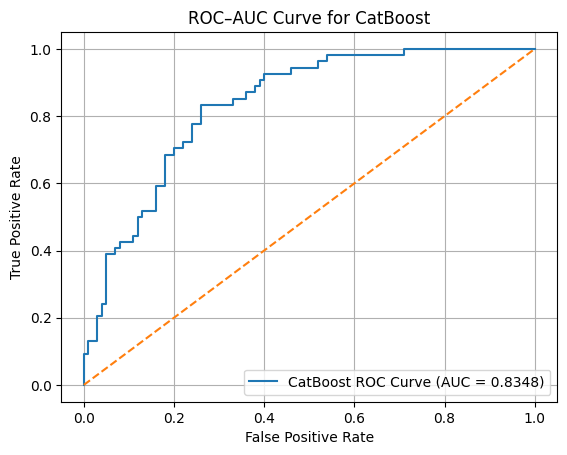

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# probability scores from CatBoost
y_probability = models["CatBoost"].predict_proba(x_test_scaled)[:, 1]

#ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probability)

# AUC score
roc_auc = roc_auc_score(y_test, y_probability)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"CatBoost ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve for CatBoost")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
import pandas as pd

test_data = pd.DataFrame({
    "Pregnancies": [2, 5, 1, 8, 3],
    "Glucose": [120, 160, 95, 180, 140],
    "BloodPressure": [70, 78, 65, 90, 75],
    "SkinThickness": [25, 32, 20, 35, 28],
    "Insulin": [85, 140, 60, 200, 120],
    "BMI": [26.5, 34.2, 22.1, 38.0, 30.5],
    "DiabetesPedigreeFunction": [0.45, 0.85, 0.20, 1.50, 0.60],
    "Age": [28, 45, 22, 55, 35],
    "Age_Group": [0, 2, 0, 3, 1],
    "BMI_Category": [1, 3, 1, 3, 2],
    "Glucose_Insulin_Ratio": [
        120/85,
        160/140,
        95/60,
        180/200,
        140/120
    ]
})


test_data_scaled = scaler.transform(test_data)

# Predictions (0 = Non-Diabetic, 1 = Diabetic)
test_predictions = models["CatBoost"].predict(test_data_scaled)

# Prediction Probabilities
test_probabilities = models["CatBoost"].predict_proba(test_data_scaled)[:, 1]

# Show Results
test_results = test_data.copy()
test_results["Predicted_Outcome"] = test_predictions
test_results["Diabetes_Probability"] = test_probabilities

print(test_results)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      120             70             25       85  26.5   
1            5      160             78             32      140  34.2   
2            1       95             65             20       60  22.1   
3            8      180             90             35      200  38.0   
4            3      140             75             28      120  30.5   

   DiabetesPedigreeFunction  Age  Age_Group  BMI_Category  \
0                      0.45   28          0             1   
1                      0.85   45          2             3   
2                      0.20   22          0             1   
3                      1.50   55          3             3   
4                      0.60   35          1             2   

   Glucose_Insulin_Ratio  Predicted_Outcome  Diabetes_Probability  
0               1.411765                  0              0.155160  
1               1.142857                  1              0.91127

In [34]:
import joblib

# Get your final CatBoost model
cat_model = models["CatBoost"]

# Save CatBoost model
cat_model.save_model("catboost_diabetes.cbm")

# Save scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']